This notebook tests the MMM Agent

In [5]:
import mlflow
from mlflow.models import ModelConfig
from databricks.sdk import WorkspaceClient
from openai import OpenAI

workspace_client = WorkspaceClient()
workspace_url = workspace_client.config.host
token = workspace_client.config.token
client = OpenAI(api_key=token, base_url=f"{workspace_url}/serving-endpoints")
config = ModelConfig(development_config="../config/agent/agent_config.yaml")

In [6]:
# Read our example questions
import pandas as pd
import numpy as np
questions_df = pd.read_json('questions.jsonl', lines=True)
row = questions_df.iloc[np.random.randint(0, len(questions_df))]

In [7]:
from mediamix.agents import create_initial_state, create_mmm_agent
mmm_agent = create_mmm_agent(client, config)
initial_state = create_initial_state(row["question"])

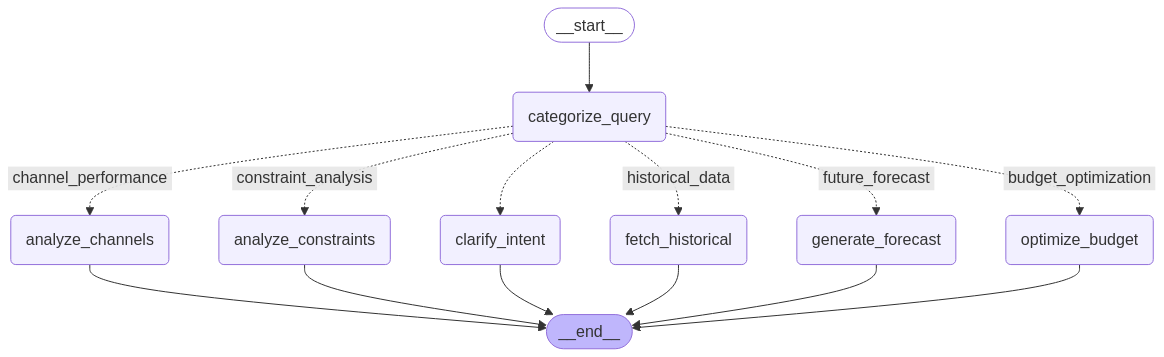

In [8]:
from IPython.display import Image, display
png = mmm_agent.get_graph().draw_mermaid_png()
display(Image(png))

In [9]:
mmm_agent.invoke(initial_state)

{'messages': [HumanMessage(content='How should we allocate our total budget across all channels to maximize overall ROAS if we were to increase the entire budget by 10%?', additional_kwargs={}, response_metadata={}),
  FunctionMessage(content='{"category": "budget_optimization", "confidence": 5, "reasoning": "This question is about optimizing budget distribution across channels to achieve the best possible ROAS, which falls under the budget_optimization category due to its focus on budget allocation strategies for maximizing ROI."}', additional_kwargs={}, response_metadata={}, name='QueryCategorizer'),
  FunctionMessage(content='Budget optimization completed', additional_kwargs={}, response_metadata={}, name='optimize_budget')],
 'query_category': 'budget_optimization',
 'query_category_confidence': 5,
 'query_category_reasoning': 'This question is about optimizing budget distribution across channels to achieve the best possible ROAS, which falls under the budget_optimization category 